In [2]:
#IMPORT ALL MODULES TO ANSWER ALL QUESTIONS#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
!pip install -U pandasql
from pandasql import sqldf
import pylab
from urllib import urlretrieve

In [250]:
#IMPORT ALL FILES USED TO ANSWER ALL QUESTIONS#

#Import practice information from December 2015
url = 'http://datagov.ic.nhs.uk/presentation/2015_12_December/T201512PDPI+BNFT.CSV'

#Save file locally
urlretrieve(url, 'T201512PDPI+BNFT.CSV')

#Read file into dataframe
Dec2015 = pd.read_csv('T201512PDPI+BNFT.CSV', sep=',')

In [313]:
#Strip white space from column headers
Dec2015.columns = [x.strip() for x in Dec2015.columns] 

In [251]:
#Import GP practice demographic lookup
url = 'https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age.CSV'

#Save file locally
urlretrieve(url, 'gp-reg-patients-prac-quin-age.CSV')

#Read file into dataframe
Practice_Demographic = pd.read_csv('gp-reg-patients-prac-quin-age.CSV')

In [253]:
#Import ONS lookup
url = 'https://opendata.camden.gov.uk/api/views/tr8t-gqz7/rows.csv?accessType=DOWNLOAD'

#Save file locally
urlretrieve(url, 'rows.csv')

#Read file into dataframe
ONS_Data = pd.read_csv('rows.csv')

In [254]:
#Import GP Practice lookup
url = 'http://datagov.ic.nhs.uk/presentation/2015_12_December/T201512ADDR+BNFT.CSV'

#Save file locally
urlretrieve(url, 'T201512ADDR+BNFT.CSV')

#Read file into dataframe & create headers
cols = ['Date', 'Practice Code', 'Surgery Name', 'Address 1', 'Address 2', 'City', 'Region', 'Postcode']
Practices =  pd.read_csv('T201512ADDR+BNFT.CSV', header=None, names=cols, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

In [255]:
#Import Index of Multiple Deprivation lookup
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'

#Save file locally
urlretrieve(url, 'deprivation-by-postcode.csv')

#Read file into dataframe
IMD_Data = pd.read_csv('deprivation-by-postcode.csv')

In [256]:
#Import Under 75 CVD mortality rates
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'

#Save file locally
urlretrieve(url, 'NHSOF_1.1_I00656_D.csv')

#Read file into dataframe
Mortality_Data = pd.read_csv('NHSOF_1.1_I00656_D.csv')

In [257]:
#Google Flu Trends Nea Zealand
url = 'https://www.google.org/flutrends/about/data/flu/nz/data.txt'

#Save file locally
urlretrieve(url, 'nzdata.txt')

#Read file into dataframe & create headers
cols = ['Date', 'New Zealand', 'North Island', 'South Island']
NZ_Flu_Data = pd.read_csv('nzdata.txt',skiprows=12, sep=',', header=None, names=cols).rename(columns=lambda x: x.strip())

In [258]:
#Google Flu Trends France
url = 'https://www.google.org/flutrends/about/data/flu/fr/data.txt'

#Save file locally
urlretrieve(url, 'francedata.txt')

#Read file into dataframe & create headers
cols = ['Date', 'France', 'Alsace', 'Aquitaine', 'Auvergne', 'Burgundy', 'Brittany', 'Centre', 'Champagne-Ardenne', 'Franche-Comte', 'Ile-de-France', 'Languedoc-Roussillon', 'Lorraine', 'Midi-Pyrenees', 'Nord-Pas-de-Calais', 'Normandy - Lower', 'Normandy - Upper', 'Pays de la Loire', 'Picardie', 'Poitou-Charentes', 'Provence-Alpes-Cote dAzur', 'Rhône-Alpes']
France_Flu_Data = pd.read_csv('francedata.txt',skiprows=12, sep=',', header=None, names=cols).rename(columns=lambda x: x.strip())

In [298]:
#Assignment A -- Question 1

#Identify all GP practices and produce a table with the total number of prescriptions 
#and their total actual cost (using the ACT COST column).

#Remove white spaces from City column
Practices['City'] = Practices['City'].map(lambda x: x.strip())

#Identify Brighton GP practices
Brighton = Practices[Practices['City'] == 'BRIGHTON']

#Find postcodes in Brighton
Brighton_Practice_Codes = Brighton['Practice Code']

#Use identified Brighton GP practices to create a subset of the data
Brighton_Data = Dec2015[Dec2015['PRACTICE'].isin(Brighton_Practice_Codes)].copy(deep=True)

#Sum columns by Practice
Brighton_Practice_Sum = Brighton_Data.groupby(['PRACTICE']).sum()

#Select columns needed
Brighton_AA_Question_1 = Brighton_Practice_Sum.iloc[:, [0,2]]

#Reset the index
Brighton_AA_Question_1.reset_index(inplace=True)

#Final table
Brighton_AA_Question_1

,PRACTICE,ITEMS,ACT COST
0,G81006,16104,119267.21
1,G81011,21739,164526.29
2,G81014,9101,74577.84
3,G81018,12394,98820.66
4,G81028,16321,125740.16
5,G81036,15833,127388.44
6,G81038,15967,124729.93
7,G81042,11519,108793.33
8,G81044,4801,53368.37
9,G81046,20751,199675.40


In [314]:
#Assignment A -- Question 2

#Find the top ten most/least frequently prescribed medications across all practices. 

#Sum columns by Medication
Brighton_Med_Grouped = Brighton_Data.groupby('BNF NAME').sum()

#Select columns needed
Brighton_A_2 = Brighton_Med_Grouped.iloc[:, [0,2]]

#Sort by Items (number of prescriptions)
Brighton_A_2_Sorted = Brighton_A_2.sort_values('ITEMS', axis=0, ascending=False, kind='quicksort', na_position='last')

#Reset the index
Brighton_A_2_Sorted.reset_index(inplace=True)

#Top 10
Brighton_A_2_top10 = Brighton_A_2_Sorted.head(10)
print(Brighton_A_2_top10)

#Bottom 10
Brighton_A_2_bottom10 = Brighton_A_2_Sorted.tail(10)
print(Brighton_A_2_bottom10)

#What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

#Top 10 Costs
Brighton_Top_10_Costs = (Brighton_A_2_top10['ACT COST'].sum())
print(Brighton_Top_10_Costs)

#Bottom 10 Costs
Brighton_Bottom_10_Costs = (Brighton_A_2_bottom10['ACT COST'].sum())
print(Brighton_Bottom_10_Costs)

#Entire City Costs
Brighton_Entire_Costs = Brighton_Data['ACT COST'].sum()
print(Brighton_Entire_Costs)

#Select columnn for descriptive stats
Brighton_Practice_Stats = Brighton_Practice_Sum.iloc[:,[2]]

#Reset the index
Brighton_Practice_Stats.reset_index(inplace=True)

#Descriptive statistics of Practice Costs
Brighton_Practice_Stats.describe().unstack()

#Narrative for Assignment A Question 2

#As can be seen from the figures below the Top Ten Prescribed Medications are 3.24% of total medication spend,
#while the Bottom Ten Prescribed Medications are 0.03% of total medication spend.

#The Top Ten Prescribed Medications of 81,839 is higher than a mean average practice cost of 58,787.

#The Bottom Ten Prescribed Medications of 737.5 is much lower than the mean average practice cost.

                                   BNF NAME  ITEMS  ACT COST
0  Lansoprazole_Cap 15mg (E/C Gran)           5546   7170.28
1  Simvastatin_Tab 40mg                       5407   6855.56
2  Aspirin Disper_Tab 75mg                    5126   4503.83
3  Omeprazole_Cap E/C 20mg                    4810   6973.92
4  Paracet_Tab 500mg                          4206  12959.28
5  Ventolin_Evohaler 100mcg (200 D)           4016   9071.97
6  Lansoprazole_Cap 30mg (E/C Gran)           3858   5510.17
7  Amlodipine_Tab 5mg                         3582   4387.71
8  Levothyrox Sod_Tab 50mcg                   3378   9693.85
9  Levothyrox Sod_Tab 25mcg                   3286  14713.09
                                      BNF NAME  ITEMS  ACT COST
5343  Promazine HCl_Tab 25mg                        1     25.99
5344  Prolia_Inj 60mg/1ml Pfs                       1    189.22
5345  Gppe Breath Test Kit_diabact UBT              1     19.66
5346  Progynova TS_Patch 50mcg/24hrs                1     11.76
5347  Pro

ACT COST     count        43.000000
             mean      58787.856047
             std       52182.486385
             min          23.490000
             25%       16414.540000
             50%       44795.790000
             75%       95114.140000
             max      199675.400000
dtype: float64

In [302]:
#Assignment A Question 3

#Find the top ten most expensive medications and calculate their total actual cost.

#Sum columns by Medication
Brighton_Med_Grouped = Brighton_Data.groupby('BNF NAME').sum()

#Select appropriate columns
Brighton_A_3 = Brighton_Med_Grouped.iloc[:, [1,2]]

#Sort by NIC (drug cost)
Brighton_A_3_Sorted = Brighton_A_3.sort_values('NIC', axis=0, ascending=False, kind='quicksort', na_position='last')

#Top Ten
Brighton_A_3_TopTen = Brighton_A_3_Sorted.head(10)

#Print Answer
print(Brighton_A_3_TopTen['ACT COST'].sum())

233359.38


In [315]:
#Assignment A Question 4

#How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

#identify Cambridge GP practices
Cambridge = Practices[Practices['City'] == 'CAMBRIDGE']

#create data subset of Cambridge GP practice codes
CambridgeCodes = Cambridge['Practice Code']

#use identified Cambridge GP practices to create a subset of the data
Cambridge_Data = Dec2015[Dec2015['PRACTICE'].isin(CambridgeCodes)].copy(deep=True)

#Entire Cambridge City Actual Costs
print(Cambridge_Data['ACT COST'].sum())

#Entire Cambridge City Prescriptions
print(Cambridge_Data['ITEMS'].sum())

#Entire Cambridge City Drug Costs
print(Cambridge_Data['NIC'].sum())

#Entire Brighton City Actual Costs
print(Brighton_Data['ACT COST'].sum())

#Entire Brighton City Prescriptions
print(Brighton_Data['ITEMS'].sum())

#Entire Brighton City Drug Costs
print(Brighton_Data['NIC'].sum())

#Assignment A Question 4 Narrative#

#Cambridge prescribes more than Brighton by 40,000.
#However this only leads to 80,000 more in actual costs for Cambridge.
#The drug cost is only 10,000 higher in Cambridge.

2607317.49
345193
2808869.0900000003
2527877.81
308014
2715805.29


In [312]:
#Assignment A Question 5

#Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

#set as global
pysqldf = lambda q: sqldf(q, globals())

#read table into dataframe
Practices_df_A = pd.DataFrame(Practices)

#print SQL coding which counts practice code grouped by city 
print(pysqldf("SELECT COUNT([Practice Code]) AS [Total], [City] FROM Practices_df_A GROUP BY [City] ORDER BY COUNT([Practice Code]) DESC"))

#The blanks indicate poor data quality - i.e. most of them are London. 

      Total                      City
0       339                          
1       173                BIRMINGHAM
2       137                 LIVERPOOL
3       122                     LEEDS
4       117                MANCHESTER
5       105                 SHEFFIELD
6        95                   BRISTOL
7        95                  COVENTRY
8        92                    LONDON
9        85                  BRADFORD
10       84                 LEICESTER
11       78                NOTTINGHAM
12       56                  PLYMOUTH
13       56             WOLVERHAMPTON
14       54       NEWCASTLE UPON TYNE
15       49                   PRESTON
16       49            STOKE ON TRENT
17       47                SUNDERLAND
18       46                   WALSALL
19       45                 DONCASTER
20       44               SOUTHAMPTON
21       43                  BRIGHTON
22       43              HUDDERSFIELD
23       42                    BOLTON
24       42                    OLDHAM
25       41 

In [316]:
#Assignment B -- Question 1

#Calculate the monthly total spending for each GP-practice.

#grouby practice to get total actual costs
total_costs_practices =pd.DataFrame(Dec2015.groupby(Dec2015.PRACTICE).apply(lambda subf: subf['ACT COST'].sum()))
total_costs_practices.columns = ['total_costs_per_practice']

#Resetting the index
total_costs_practices.reset_index(inplace=True)
total_costs_practices

,PRACTICE,total_costs_per_practice
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51
5,A81006,197436.78
6,A81007,141780.85
7,A81008,62463.90
8,A81009,139612.91
9,A81011,188196.12


In [318]:
#Assignment B Question 2

#Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

#merge the practice demographic table with the prescribing dataset
Practice_Costs_Demographics = pd.merge(total_costs_practices, Practice_Demographic[['GP_PRACTICE_CODE', 'Total_All']], left_on='PRACTICE' , right_on='GP_PRACTICE_CODE')

#Relative costs per patient
Practice_Costs_Demographics['cost_per_patient'] = Practice_Costs_Demographics['total_costs_per_practice'] / Practice_Costs_Demographics['Total_All']

#print answer
print(Practice_Costs_Demographics.iloc[:,[0,1,3,4]])

     PRACTICE  total_costs_per_practice  Total_All  cost_per_patient
0      A81001                  83220.57       4234         19.655307
1      A81002                 333514.67      19691         16.937417
2      A81003                  47977.16       3357         14.291677
3      A81004                 147494.85       9151         16.117894
4      A81005                 107669.51       7883         13.658443
5      A81006                 197436.78      12345         15.993259
6      A81007                 141780.85       9744         14.550580
7      A81008                  62463.90       4027         15.511274
8      A81009                 139612.91       9175         15.216666
9      A81011                 188196.12      11435         16.457903
10     A81012                  67075.08       4749         14.124043
11     A81013                  93712.27       6182         15.158892
12     A81014                  72565.60       3821         18.991259
13     A81015                  510

(0, 60352.0)

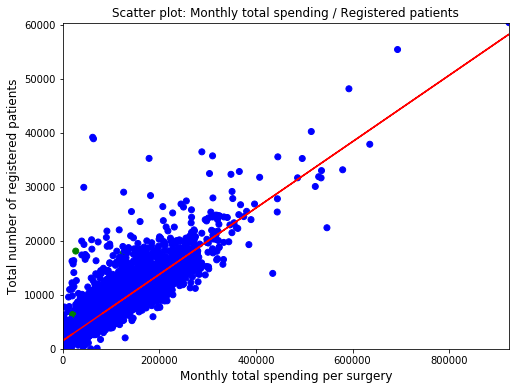

In [337]:
#Assignment B -- Question 3

#Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

from math import floor

#merge the practice cost & demographic table with the Brighton dataset
Practice_Costs_Demographics_City = pd.merge(Practice_Costs_Demographics, Brighton[['Practice Code', 'City']], left_on='PRACTICE' , right_on='Practice Code', how = 'left')

#Plot graph
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= Practice_Costs_Demographics_City['total_costs_per_practice']
y = Practice_Costs_Demographics_City['Total_All']

#colour Brighton practices green and the rest blue
colours = np.where(Practice_Costs_Demographics_City['City']=='BRIGHTON','g','b')
ax.scatter(x, y, color=colours)
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: Monthly total spending / Registered patients')
ax.set_xlabel("Monthly total spending per surgery",fontsize=12)
ax.set_ylabel("Total number of registered patients",fontsize=12)
max_x = floor(Practice_Costs_Demographics_City.total_costs_per_practice.max())
max_y = floor(Practice_Costs_Demographics_City.Total_All.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)


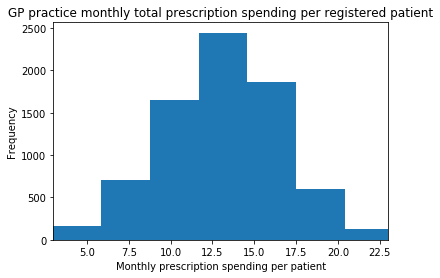

In [339]:
#Assignment B -- Question 4

#Visualize the relative costs per patient of all national GP-practices in a histogram.

x = Practice_Costs_Demographics_City.cost_per_patient.values

plt.hist(x, bins=20000)
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

min_x = floor(Practice_Costs_Demographics_City['cost_per_patient'].quantile(.01))
max_x = floor(Practice_Costs_Demographics_City['cost_per_patient'].quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()

In [344]:
#Assignment B -- Question 5

#Use descriptive statistics to show how your assigned city compares to the national level.

#Entire Brighton City Actual Costs
total_costs_Brighton_practices =pd.DataFrame(Brighton_Data.groupby(Brighton_Data.PRACTICE).apply(lambda subf: subf['ACT COST'].sum()))
total_costs_Brighton_practices.columns = ['total_costs_per_practice']

# Resetting the index
total_costs_Brighton_practices.reset_index(inplace=True)
total_costs_Brighton_practices.head()

#Merge datsets to get number of patients
Merged_Brighton = pd.merge(total_costs_Brighton_practices, Practice_Demographic[['GP_PRACTICE_CODE', 'Total_All']], left_on='PRACTICE' , right_on='GP_PRACTICE_CODE')

#Create new column of cost per patient - costs per practices divided by the number of registered patients
Merged_Brighton['cost_per_patient'] = Merged_Brighton['total_costs_per_practice'] / Merged_Brighton['Total_All'] 

#Select columnn for Brighton
Brighton_Descriptive = Merged_Brighton.iloc[:, [4]]

#Descriptive Statistics on Brighton costs per patient
print(Brighton_Descriptive.describe().unstack())

#Select columns for National
National_Descriptive = Practice_Costs_Demographics.iloc[:,[4]]

#Descriptive Statistics on National costs per patient
print(National_Descriptive.describe().unstack())

#Assignment B -- Question 5 -- Narrative

#The data has many outliers and therefore the data is skewed. THe max and min for the national dataset has a huge range.
#The mean is double that of Brighton for the national dataset. However there is a max of 58,319.

cost_per_patient  count    32.000000
                  mean     11.970798
                  std       3.780374
                  min       1.504610
                  25%       9.417946
                  50%      12.898277
                  75%      14.429137
                  max      17.595333
dtype: float64
cost_per_patient  count     7701.000000
                  mean        21.317316
                  std        665.570655
                  min          0.001872
                  25%         10.689451
                  50%         13.212266
                  75%         15.504289
                  max      58319.780000
dtype: float64


In [345]:
#Assignment C -- Question 1

#Identify for all GP-practices the relative costs per patient for all statin prescriptions 
#(simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

#Link Dec2015 to GP demographics
Full_Data = pd.merge(Dec2015, gp_counts[['GP_PRACTICE_CODE', 'Total_All']], left_on='PRACTICE' , right_on='GP_PRACTICE_CODE')

#Select Statins
Statin_Data = Full_Data[Full_Data['BNF NAME'].str.contains("vastatin")==True]

#Sum columns by Practice
Statin_Practice_Sum = Statin_Data.groupby(['PRACTICE']).sum()

#Calculate the statin cost per patient
Statin_Practice_Sum['cost_per_patient'] = Statin_Practice_Sum['ACT COST'] / Statin_Practice_Sum['Total_All'] 

#Select columns needed
Statin_Costs = Statin_Practice_Sum.iloc[:, [2,5,6]]
Statin_Costs.reset_index(inplace=True)

#Print answer
print(Statin_Costs)

     PRACTICE  ACT COST  Total_All  cost_per_patient
0      A81001   1816.80      67744          0.026819
1      A81002   6513.51     374129          0.017410
2      A81003    868.39      43641          0.019898
3      A81004   2134.60     146416          0.014579
4      A81005   1887.11     110362          0.017099
5      A81006   4074.99     259245          0.015719
6      A81007   2245.57     185136          0.012129
7      A81008   1398.07      44297          0.031561
8      A81009   1588.11     137625          0.011539
9      A81011   2945.80     194395          0.015154
10     A81012    950.01      75984          0.012503
11     A81013   1114.08      86548          0.012872
12     A81014   1344.87      57315          0.023465
13     A81015    667.46      42840          0.015580
14     A81016   2160.25     173340          0.012463
15     A81017   4339.35     394174          0.011009
16     A81018   1633.29      71149          0.022956
17     A81019   2253.49     166096          0.

In [346]:
#Assignment C -- Question 2

#Identify for all GP-practices the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

#NOTE: This is not how IMD works - all that is being worked out is the LSOA deprivation that the practice sits in. 
#A GP practice can serve an area bigger than the LSOA it is situated in.

#Select certain columns from IMD
IMD_Subset_Data = IMD_Data.iloc[:, [0,4]]

#Delete duplicate lines
IMD_No_Duplicates = IMD_Subset_Data.drop_duplicates()

#Merge the Brigton data with the IMD data
IMD_Brighton_Data = pd.merge(Brighton, IMD_No_Duplicates[['Postcode','Index of Multiple Deprivation Rank']], how='left', on='Postcode')

#Select columns
Final_IMD_Brighton = IMD_Brighton_Data.iloc[:, [1,8]]

#print answer
print(Final_IMD_Brighton)

   Practice Code  Index of Multiple Deprivation Rank
0         G81006                              3581.0
1         G81011                              2353.0
2         G81014                              8081.0
3         G81018                              9225.0
4         G81028                             12089.0
5         G81036                              8081.0
6         G81038                             16572.0
7         G81042                             16572.0
8         G81044                             17849.0
9         G81046                              6264.0
10        G81047                             15310.0
11        G81054                              3581.0
12        G81063                              9335.0
13        G81065                              7287.0
14        G81071                             22221.0
15        G81073                              5951.0
16        G81076                             20082.0
17        G81090                              

In [373]:
#Assignment C -- Question 3

#Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile.
#Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD).
#Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

#Create a multiplier column for the statin cost per patient
Statin_Costs['cost_per_patient2'] = Statin_Costs['ACT COST'] / Statin_Costs['Total_All'] 

Statin_Costs.loc[:,'cost_per_patient2'] *= 100000

#Use the multiplied column to find the bottom and top decile
Statin_1st_Decile = floor(Statin_Costs['cost_per_patient2'].quantile(.01))
Statin_99th_Decile = floor(Statin_Costs['cost_per_patient2'].quantile(.99))

#Print Decile
print(Statin_1st_Decile)
print(Statin_99th_Decile)

384.0
3933.0


C:\Users\Thomas\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [351]:
#Use the multiplied decile costs to find the bottom and top
Statin_Bottom = Statin_Costs[Statin_Costs.cost_per_patient2 < 384]

Statin_Top = Statin_Costs[Statin_Costs.cost_per_patient2 > 3933]

In [353]:
#Join IMD Rank to all practices nationally
IMD_National_Data = pd.merge(Practices, IMD_No_Duplicates[['Postcode','Index of Multiple Deprivation Rank']], how='left', on='Postcode')

#Select the columns needed
Final_IMD_National = IMD_National_Data.iloc[:, [1,8]]

#Join IMD rank to Statin bottom & top
Statin_Bottom_IMD = pd.merge(Statin_Bottom, Final_IMD_National[['Practice Code','Index of Multiple Deprivation Rank']], left_on='PRACTICE', right_on='Practice Code')
Statin_Top_IMD = pd.merge(Statin_Top, Final_IMD_National[['Practice Code','Index of Multiple Deprivation Rank']], left_on='PRACTICE', right_on='Practice Code')

#Select columnns
Statin_Bottom_IMD_Descriptive = Statin_Bottom_IMD.loc[:, ['Index of Multiple Deprivation Rank']]
Statin_Top_IMD_Descriptive = Statin_Top_IMD.loc[:, ['Index of Multiple Deprivation Rank']]

#Descriptive Statistics on Brighton costs per patient
print(Statin_Bottom_IMD_Descriptive.describe().unstack())
print(Statin_Top_IMD_Descriptive.describe().unstack())

#Assignment C -- Question 3 -- Narrative

#There appears to be very little difference in IMD for the top and bottom decile of statin prescriptions.

Index of Multiple Deprivation Rank  count       76.000000
                                    mean     13097.276316
                                    std       8848.166485
                                    min        118.000000
                                    25%       6311.000000
                                    50%      10737.500000
                                    75%      20305.250000
                                    max      32274.000000
dtype: float64
Index of Multiple Deprivation Rank  count       78.000000
                                    mean     13843.666667
                                    std       9000.961825
                                    min         72.000000
                                    25%       6945.500000
                                    50%      13893.000000
                                    75%      21271.750000
                                    max      30506.000000
dtype: float64


In [354]:
#Assignment C -- Question 4

#Identify for all GP-practices the associated nine English regions.

PracticeCode_Postcode = Practice_Demographic.iloc[:, [0,1]]

ONS_Postcode_Region = ONS_Data.iloc[:, [2,17]]
ONS_Postcode_Region.drop_duplicates()

Practice_Region_Postcode = pd.merge(ONS_Postcode_Region, PracticeCode_Postcode[['POSTCODE','GP_PRACTICE_CODE']], left_on='Postcode 3' , right_on='POSTCODE')

Practice_Region = Practice_Region_Postcode.iloc[:, [1,3]]

print(Practice_Region)


                   Region Name GP_PRACTICE_CODE
0                       London           F83042
1                   North West           N82668
2                   North West           P86026
3                       London           G85120
4                   North East           A89610
5                East Midlands           C83056
6                   North West           Y02767
7                East Midlands           C84085
8                   North West           N83035
9                   South East           H81029
10                      London           E87005
11                      London           E84008
12                  North East           A84024
13                  North East           A84033
14             East of England           F81738
15                  South East           H82029
16                  North West           P87648
17                      London           E85746
18               West Midlands           M85047
19               West Midlands          

In [357]:
#Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

#filter the dataset for the year and information required
Mortality_Filtered = Mortality_Data[(Mortality_Data['Year'] == 2015) & (Mortality_Data['Breakdown'] == 'Region') & (Mortality_Data['Gender'] == 'Person')]

#select columns - according to the information that comes with this dataset the indicator value is the best
#measurement of mortality rate for this particular disease as it is adjusted
Mortality_Region = Mortality_Filtered.iloc[:, [4,7]]

#print answer
print(Mortality_Region)

            Level description Indicator value
471             East Midlands            76.7
472           East of England            66.3
473                    London            76.7
474                North East              86
475                North West            88.3
476                South East            60.8
477                South West            64.5
478             West Midlands            77.9
479  Yorkshire and The Humber            82.8


TypeError: cannot convert the series to <type 'float'>

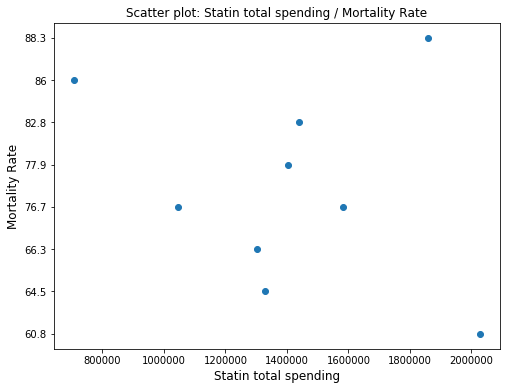

In [365]:
#Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis].

#select columns
Practice_Code_Postcode = Practice_Demographic.iloc[:, [0,1]]

#Merge the statins datset with the postcodes
Practice_Postcode_Statins = pd.merge(Practice_Code_Postcode, Statin_Costs[['PRACTICE','ACT COST']], left_on='GP_PRACTICE_CODE' , right_on='PRACTICE')

#select columns and drop the duplicates
ONS_Postcode_Region = ONS_Data.iloc[:, [2,17]]
ONS_Postcode_Region.drop_duplicates()

#Merge the ONS dataset with the merged statins & postcodes to getregion
Statins_Regions = pd.merge(ONS_Postcode_Region, Practice_Postcode_Statins[['POSTCODE','ACT COST']], left_on='Postcode 3' , right_on='POSTCODE')

#Group by region to get statin totals
Statins_Regions_Summed = Statins_Regions.groupby('Region Name').sum()

#Plot graph
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= Statins_Regions_Summed['ACT COST']
y = Mortality_Region['Indicator value']
ax.scatter(x, y)
ax.set_title('Scatter plot: Statin total spending / Mortality Rate')
ax.set_xlabel("Statin total spending",fontsize=12)
ax.set_ylabel("Mortality Rate",fontsize=12)
max_y = floor(Mortality_Region['Indicator value'].max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

In [ ]:
#Assess whether relative spending for statin prescriptions in each regions correlates 
#with the mortality rate from cardiovascular diseases.

#Judging by the scatterplot there is no correlation between statin total spending and mortality rate.
#Although this is aggregated data and is by region. Possibly looking by practice would work better. 

Text(0.5,0,u'Year')

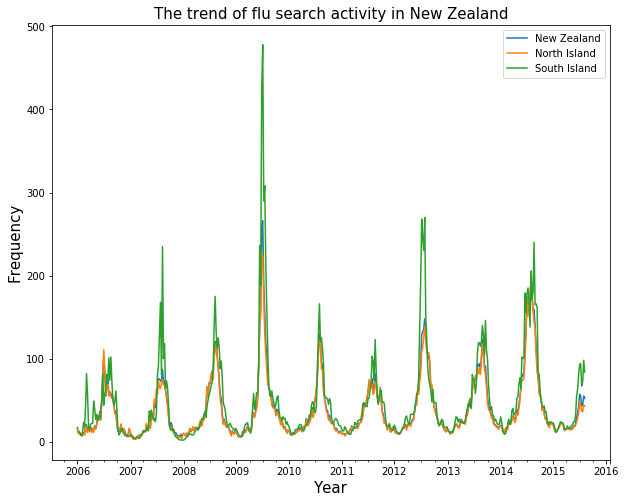

In [366]:
#Assignment D

#Using the Google FluTrends surveillance data, pick two random countries,
#one in the Northern hemisphere and one in the Southern hemisphere. For each of country:

#Provide a visualisation of the seasonal patterns across all years.

#Change the date column to datetime
NZ_Flu_Data['Date'] = pd.to_datetime(NZ_Flu_Data['Date'])

#Plot the graph
%matplotlib inline
fig_ca = NZ_Flu_Data.plot(x='Date', figsize=(10,8))
fig_ca.set_title('The trend of flu search activity in New Zealand',fontsize=15)
fig_ca.set_ylabel('Frequency',fontsize=15)
fig_ca.set_xlabel('Year',fontsize=15)

Text(0.5,0,u'Year')

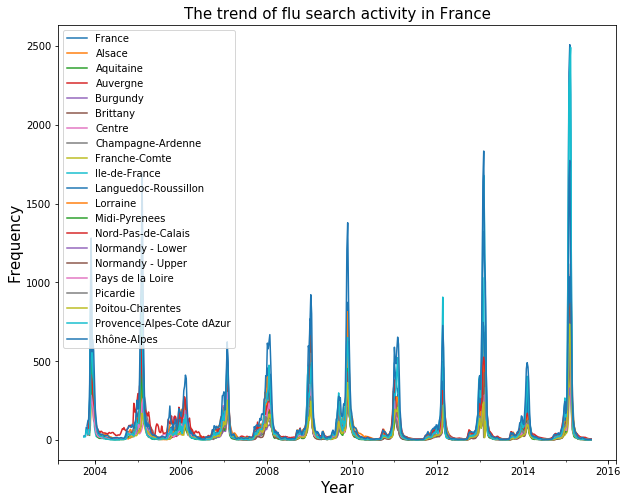

In [367]:
#Change the date column to datetime
France_Flu_Data['Date'] = pd.to_datetime(France_Flu_Data['Date'])

#Plot the graph
%matplotlib inline
fig_ca = France_Flu_Data.plot(x='Date', figsize=(10,8))
fig_ca.set_title('The trend of flu search activity in France',fontsize=15)
fig_ca.set_ylabel('Frequency',fontsize=15)
fig_ca.set_xlabel('Year',fontsize=15)

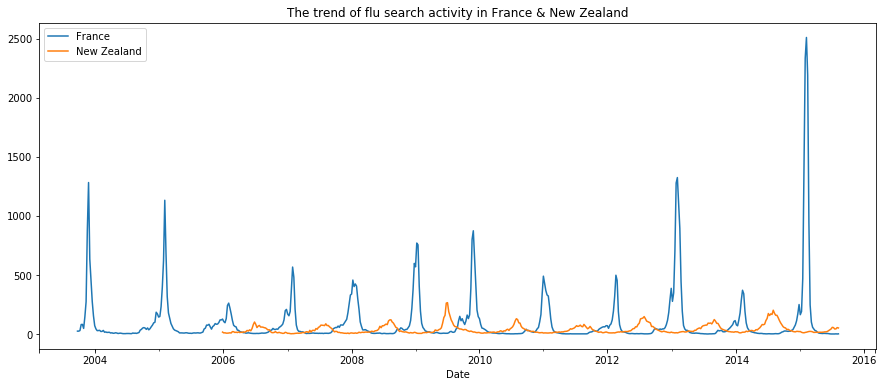

In [470]:
#Plot the national numbers over te top of each other
%matplotlib inline
ax = France_Flu_Data.plot(legend ='left', x='Date', y = 'France', figsize=(15, 6), grid=True)
ax.set_title('The trend of flu search activity in France & New Zealand')
NZ_Flu_Data.plot(x='Date', y = 'New Zealand' , ax=ax)

#the flu trend occurs at different times of the year for the northern and southern hemispheres 

In [368]:
#Calculate the yearly minimum and maximum for each country.

NZ_Flu_Data['Year'] = NZ_Flu_Data['Date'].dt.year
France_Flu_Data['Year'] = France_Flu_Data['Date'].dt.year


NZ_Flu_Max = NZ_Flu_Data.groupby(['Year']).max()

print(NZ_Flu_Max)

NZ_Flu_Min = NZ_Flu_Data.groupby(['Year']).min()

print(NZ_Flu_Min)

France_Flu_Max = France_Flu_Data.groupby(['Year']).max()

print(France_Flu_Max)

France_Flu_Min = France_Flu_Data.groupby(['Year']).min()

print(France_Flu_Min)

           Date  New Zealand  North Island  South Island
Year                                                    
2006 2006-12-31          102           111         102.0
2007 2007-12-30           87            75         235.0
2008 2008-12-28          121           118         175.0
2009 2009-12-27          266           229         478.0
2010 2010-12-26          130           122         166.0
2011 2011-12-25           82            75         123.0
2012 2012-12-30          148           139         270.0
2013 2013-12-29          123           118         146.0
2014 2014-12-28          202           204         240.0
2015 2015-08-09           57            48          98.0
           Date  New Zealand  North Island  South Island
Year                                                    
2006 2006-01-01            6             7           6.0
2007 2007-01-07            3             3           2.0
2008 2008-01-06            7             6           2.0
2009 2009-01-04            6   

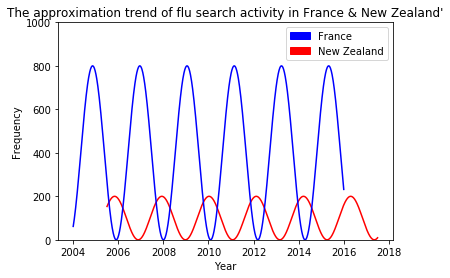

In [471]:
# Provide and plot a reasonable mathematical function that could be used as an approximation 
#for the seasonal trend for each country.

x = np.linspace(2004, 2016,1000)
NZ = np.cos(x*3)+1
F = np.sin(x*3)+1

#Plot Graph
plt.title("The approximation trend of flu search activity in France & New Zealand'")
plt.ylim(0, 1000)
plt.plot(x+1.5,NZ*100,'r')
plt.plot(x,F*400,'b')
blue = mpatches.Patch(color='blue',label='France')
red = mpatches.Patch(color='red',label='New Zealand')
plt.legend(handles = [blue, red])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

#I've tried to recreate the average sized peak for France and New Zealand
#I was also trying to recreate the northern and southern hemisphere difference
#for the seasonal peak for flu.